# Preliminary Modeling (AUROC)
Using GridsearchCV for Logistic Regression, multinomial Naive Bayes, <em>k</em>-NN, and Random Forest classifiers to build a model maximizing AUROC. AUROC is preferred for H1N1 which has imbalanced classes.

### Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, plot_confusion_matrix

### Setting up data

In [2]:
#read in data
data = pd.read_csv('../data/train_clean.csv', index_col='respondent_id')

In [8]:
cols = list(data.select_dtypes('object').columns)

In [10]:
data = pd.get_dummies(data=data, columns=cols, drop_first=True)

In [12]:
#Set up variables
X = data.drop(columns=['h1n1_vaccine', 'seasonal_vaccine'])
y_h1n1 = data['h1n1_vaccine']
y_szn = data['seasonal_vaccine']

In [13]:
#Setting up pipelines and parameters
pipe_log = Pipeline([
    ('log', LogisticRegression(max_iter=5000))
])

pipe_mnb = Pipeline([
    ('mnb', MultinomialNB())
])

pipe_knn = Pipeline([
    ('knn', KNeighborsClassifier())
])

pipe_rfc = Pipeline([
    ('rfc', RandomForestClassifier())
])

log_par = {
    'log__C': [1, 0.1, 0.01, 0.001],
    'log__solver': ['liblinear', 'lbfgs']
}

mnb_par = {
}

knn_par = {
    'knn__n_neighbors': [3, 5, 7, 9],
    'knn__weights': ['uniform', 'distance'],
    'knn__p': [1, 2],
}
    
rfc_par = {
    'rfc__n_estimators': [50, 100, 150, 200],
    'rfc__max_depth': [None, 1, 2, 3, 4, 5],
    'rfc__max_features': [6, 8, 10]
}

### Models for Seasonal Flu

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y_szn, random_state=42, stratify = y_szn)

In [21]:
gsl = GridSearchCV(pipe_log, param_grid = log_par, scoring = 'roc_auc', n_jobs = -1, cv = 5)

In [22]:
gsl.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('log',
                                        LogisticRegression(max_iter=5000))]),
             n_jobs=-1,
             param_grid={'log__C': [1, 0.1, 0.01, 0.001],
                         'log__solver': ['liblinear', 'lbfgs']},
             scoring='roc_auc')

In [23]:
gsm = GridSearchCV(pipe_mnb, param_grid = mnb_par, scoring = 'roc_auc', n_jobs = -1, cv = 5)

In [24]:
gsm.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=Pipeline(steps=[('mnb', MultinomialNB())]),
             n_jobs=-1, param_grid={}, scoring='roc_auc')

In [25]:
gsk = GridSearchCV(pipe_knn, param_grid = knn_par, scoring = 'roc_auc', n_jobs = -1, cv = 5)

In [26]:
gsk.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=Pipeline(steps=[('knn', KNeighborsClassifier())]),
             n_jobs=-1,
             param_grid={'knn__n_neighbors': [3, 5, 7, 9], 'knn__p': [1, 2],
                         'knn__weights': ['uniform', 'distance']},
             scoring='roc_auc')

In [27]:
gsr = GridSearchCV(pipe_rfc, param_grid = rfc_par, scoring = 'roc_auc', n_jobs = -1, cv = 5)

In [28]:
gsr.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('rfc', RandomForestClassifier())]),
             n_jobs=-1,
             param_grid={'rfc__max_depth': [None, 1, 2, 3, 4, 5],
                         'rfc__max_features': [6, 8, 10],
                         'rfc__n_estimators': [50, 100, 150, 200]},
             scoring='roc_auc')

### Logistic Regression

In [29]:
gsl.score(X_train, y_train), gsl.score(X_test, y_test)

(0.8578840032703468, 0.8535572985704745)

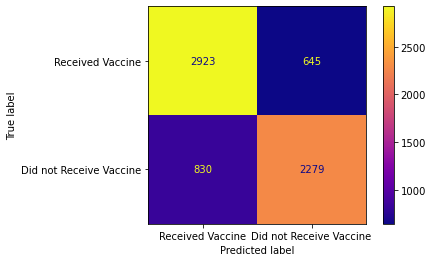

In [30]:
plot_confusion_matrix(gsl, X_test, y_test, display_labels=['Received Vaccine', 'Did not Receive Vaccine'], cmap = 'plasma');

### Multinomial Naive Bayes

In [31]:
gsm.score(X_train, y_train), gsm.score(X_test, y_test)

(0.7853977777061862, 0.7830688641539751)

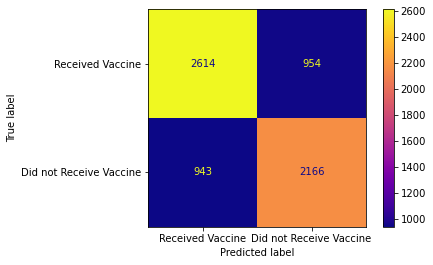

In [32]:
plot_confusion_matrix(gsm, X_test, y_test, display_labels=['Received Vaccine', 'Did not Receive Vaccine'], cmap = 'plasma');

### <em>k</em>-NN

In [33]:
gsk.score(X_train, y_train), gsk.score(X_test, y_test)

(1.0, 0.8104159665198822)

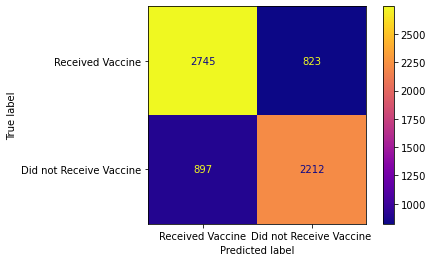

In [34]:
plot_confusion_matrix(gsk, X_test, y_test, display_labels=['Received Vaccine', 'Did not Receive Vaccine'], cmap = 'plasma');

### Random Forest Classifier

In [35]:
gsr.score(X_train, y_train), gsr.score(X_test, y_test)

(1.0, 0.8514618163382167)

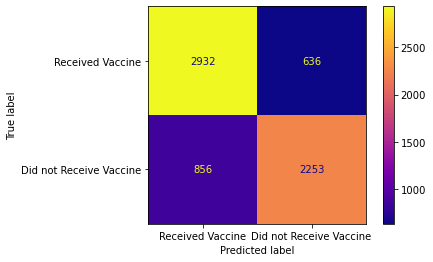

In [36]:
plot_confusion_matrix(gsr, X_test, y_test, display_labels=['Received Vaccine', 'Did not Receive Vaccine'], cmap = 'plasma');

### Same models but for H1N1

In [37]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X, y_h1n1, random_state=42, stratify = y_h1n1)

In [38]:
gsl2 = GridSearchCV(pipe_log, param_grid = log_par, scoring = 'roc_auc', n_jobs = -1, cv = 5)

In [39]:
gsl2.fit(X_train2, y_train2)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('log',
                                        LogisticRegression(max_iter=5000))]),
             n_jobs=-1,
             param_grid={'log__C': [1, 0.1, 0.01, 0.001],
                         'log__solver': ['liblinear', 'lbfgs']},
             scoring='roc_auc')

In [40]:
gsm2 = GridSearchCV(pipe_mnb, param_grid = mnb_par, scoring = 'roc_auc', n_jobs = -1, cv = 5)

In [41]:
gsm2.fit(X_train2, y_train2)

GridSearchCV(cv=5, estimator=Pipeline(steps=[('mnb', MultinomialNB())]),
             n_jobs=-1, param_grid={}, scoring='roc_auc')

In [42]:
gsk2 = GridSearchCV(pipe_knn, param_grid = knn_par, scoring = 'roc_auc', n_jobs = -1, cv = 5)

In [43]:
gsk2.fit(X_train2, y_train2)

GridSearchCV(cv=5, estimator=Pipeline(steps=[('knn', KNeighborsClassifier())]),
             n_jobs=-1,
             param_grid={'knn__n_neighbors': [3, 5, 7, 9], 'knn__p': [1, 2],
                         'knn__weights': ['uniform', 'distance']},
             scoring='roc_auc')

In [44]:
gsr2 = GridSearchCV(pipe_rfc, param_grid = rfc_par, scoring = 'roc_auc', n_jobs = -1, cv = 5)

In [45]:
gsr2.fit(X_train2, y_train2)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('rfc', RandomForestClassifier())]),
             n_jobs=-1,
             param_grid={'rfc__max_depth': [None, 1, 2, 3, 4, 5],
                         'rfc__max_features': [6, 8, 10],
                         'rfc__n_estimators': [50, 100, 150, 200]},
             scoring='roc_auc')

### Logistic Regression

In [67]:
gsl2.best_params_

{'log__C': 0.1, 'log__solver': 'lbfgs'}

In [46]:
gsl2.score(X_train2, y_train2), gsl2.score(X_test2, y_test2)

(0.8666110421039106, 0.8550088177322869)

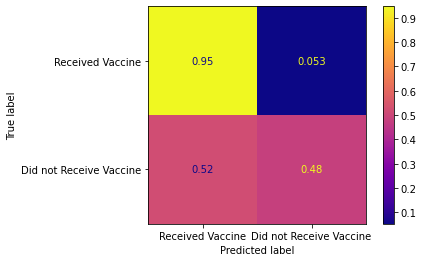

In [68]:
plot_confusion_matrix(gsl2, X_test2, y_test2, display_labels=['Received Vaccine', 'Did not Receive Vaccine'], cmap = 'plasma', normalize='true');

### Multinomial Naive Bayes

In [48]:
gsm2.score(X_train2, y_train2), gsm2.score(X_test2, y_test2)

(0.8018562593462338, 0.7889522218031598)

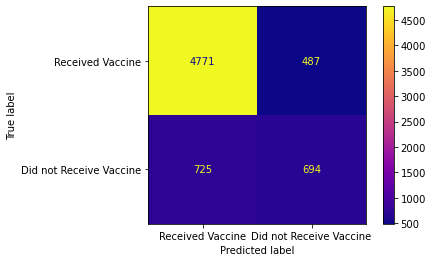

In [49]:
plot_confusion_matrix(gsm2, X_test2, y_test2, display_labels=['Received Vaccine', 'Did not Receive Vaccine'], cmap = 'plasma');

### <em>k</em>-NN

In [50]:
gsk2.score(X_train2, y_train2), gsk2.score(X_test2, y_test2)

(1.0, 0.7980549656069572)

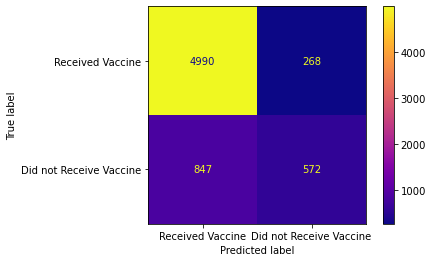

In [51]:
plot_confusion_matrix(gsk2, X_test2, y_test2, display_labels=['Received Vaccine', 'Did not Receive Vaccine'], cmap = 'plasma');

### Random Forest Classifier

In [52]:
gsr2.score(X_train2, y_train2), gsr2.score(X_test2, y_test2)

(1.0, 0.8537700597043172)

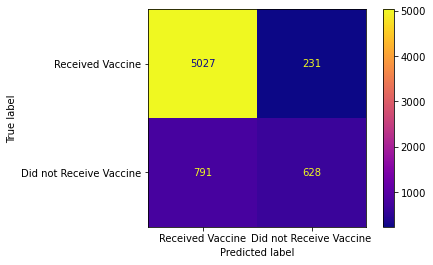

In [53]:
plot_confusion_matrix(gsr2, X_test2, y_test2, display_labels=['Received Vaccine', 'Did not Receive Vaccine'], cmap = 'plasma');